In [127]:
library(OmnipathR)
library(Seurat)
library("org.Mm.eg.db", quietly = T)
library(ggplot2)
library(dplyr)
library(reshape2)
library(dplyr)
library(broom)

source('./utility_functions.r')

In [5]:
server = 'mando'
if (server == 'jabba'){
    data_path = '/data3/hratch/norcross_abc/'
}else if (server == 'mando'){
    data_path = '/data/hratch/norcross_abc/'
}

correlates of cell proportion: https://www.sciencedirect.com/science/article/pii/S0092867419307329
cell type specific correlation of pathway

may want to use metacells again

In [6]:
abc.integrated<-readRDS(paste0(data_path, 'processed/abc_annotated.RDS'))
md<-abc.integrated@meta.data
# human.genes<-sapply(VariableFeatures(abc.integrated), function(x) toupper(x))
#                     human.genes<-unlist(unname(human.genes))

<font color='red'>Double check w/ Montse that these are the appropriate go terms
</font>

In [43]:
inflammasome.go.terms<-c("GO:0061702", 'GO:1904784', 'GO:0140973', 'GO:0140970', 'GO:0140738', 'GO:0140632', 
                         'GO:0140633', 'GO:0140634', 'GO:1900227', 'GO:0044546', 'GO:0097169', 'GO:0160074', 
                         'GO:0160075', 'GO:0072559', 'GO:0072557', 'GO:0072558')
type1.ifns.go.terms<-c('GO:1990231', 'GO:0032606', 'GO:0019962', 'GO:0038197', 'GO:0034340', 'GO:0005132', 
                       'GO:0004905', 'GO:0032481', 'GO:0060337', 'GO:0071357', 'GO:0060340')


In [42]:
inflammasome <- unique(AnnotationDbi::select(org.Mm.eg.db, inflammasome.go.terms, columns = c('SYMBOL'), keytype = "GOALL")$SYMBOL)
inflammasome

'select()' returned 1:many mapping between keys and columns



[1] "Casp1"         "Casp4"         "Casp12"        "Ddx3x"        
 [5] "Naip1"         "Naip2"         "Naip5"         "Naip6"        
 [9] "Naip7"         "Mefv"          "Pycard"        "Gsdmd"        
[13] "Nlrp6"         "Nlrp1a"        "Nlrp3"         "Dhx33"        
[17] "Nlrp9a"        "Nlrp9b"        "Nlrc4"         "Nlrp9c"       
[21] "Aim2"          "Nlrp1b"        NA              "Cd36"         
[25] "Myd88"         "Eif2ak2"       "Trim30a"       "Tlr4"         
[29] "Tlr6"          "Nek7"          "Sirt2"         "1810058I24Rik"
[33] "Atat1"         "Usp50"         "Cptp"          "Trem2"        
[37] "Gbp5"          "Plcg2"         "Nlrc3"

In [44]:
type1.ifns <- unique(AnnotationDbi::select(org.Mm.eg.db, type1.ifns.go.terms, columns = c('SYMBOL'), keytype = "GOALL")$SYMBOL)
type1.ifns

'select()' returned 1:many mapping between keys and columns



[1] "Sting1"   "Ap3b1"    "Ap3d1"    "Atg5"     "Cd14"     "Chuk"    
  [7] "Crebbp"   "Ddx3x"    "Dhx9"     "Flot1"    "Flt3"     "Gapdh"   
 [13] "Hmgb1"    "Hspd1"    "Hsp90aa1" "Irf8"     "Ifnar1"   "Irak1"   
 [19] "Irf1"     "Acod1"    "Irf9"     "Mmp12"    "Gbp4"     "Myd88"   
 [25] "Nmbr"     "Pola1"    "Ppm1b"    "Ptpn11"   "Ptpn22"   "Sirpa"   
 [31] "Ptprs"    "Rel"      "Relb"     "Stat1"    "Syk"      "Tlr4"    
 [37] "Traf3"    "Traip"    "Trex1"    "Ufd1"     "Yy1"      "Banf1"   
 [43] "Oas1g"    "Tlr2"     "G3bp1"    "Irf5"     "Tomm70a"  "Irf7"    
 [49] "Irf3"     "Pqbp1"    "Tbk1"     "Zbtb20"   "Nmi"      "Pycard"  
 [55] "Riok3"    "Polr3d"   "Polr3g"   "Atg12"    "Rnf125"   "Zcchc3"  
 [61] "Nmb"      "Trim15"   "Cactin"   "Polr3f"   "Polr3b"   "Ifih1"   
 [67] "Rnf135"   "Dhx36"    "Ppme1"    "Traf3ip1" "Polr3c"   "Garin5a" 
 [73] "Rab2b"    "Zc3hav1"  "Dhx58"    "Tlr9"     "Hmgb2"    "Oas1d"   
 [79] "Ticam1"   "Rnf216"   "D1Pas1"   "Oas1c"    "Tirap"    "Tlr3"    
 [85] "Tlr7"     "Tlr8"     "Havcr2"   "Rnf26"    "Trim38"   "Cgas"    
 [91] "Dhx33"    "Nploc4"   "Polr3a"   "Ilrun"    "Mavs"     "Rigi"    
 [97] "Oas1e"    "Plcg2"    "Setd2"    "Peli3"    "Gpatch3"  "Oas1f"   
[103] "Atg9a"    "Oas3"     "Oas2"     "Oas1h"    "Oas1a"    "Nlrc3"   
[109] "Nlrx1"    "Trim56"   "Lrrc55os" "Isg15"    "Ifnar2"   NA        
[115] "Cdc37"    "Ch25h"    "Fadd"     "Ifna1"    "Ifnb1"    "Cnot7"   
[121] "Ptpn2"    "Smpd1"    "Sp100"    "Stat2"    "Wnt5a"    "Ifi27"   
[127] "Ube2k"    "Usp27x"   "Samhd1"   "Mettl3"   "Adar"     "Ikbke"   
[133] "Usp29"    "Zbp1"     "Ifitm3"   "Lsm14a"   "Mul1"     "Ifitm1"  
[139] "Ifitm7"   "Dcst1"    "Ifitm2"   "Trim6"    "Shmt2"    "Rnf185"  
[145] "Trim41"   "Ifitm6"   "Ythdf2"   "Ttll12"   "Ythdf3"   "Shfl"    
[151] "Nlrc5"    "Ifna11"   "Ifna2"    "Ifna4"    "Ifna5"    "Ifna6"   
[157] "Ifna7"    "Ifna9"    "Ifnab"    "Ifna13"   "Ifna16"   "Ifne"    
[163] "Ifna15"   "Ifna12"   "Ifnz"     "Ifnk"     "Ifna14"   "Gm13271" 
[169] "Gm13283"  "Gm13272"  "Gm13276"  "Gm13277"  "Gm13275"

Filter for those genes present in the batch-corrected data:

In [ ]:
type1.ifns<-intersect(type1.ifns, VariableFeatures(abc.integrated))
inflammasome<-intersect(inflammasome, VariableFeatures(abc.integrated))

In [55]:
inflammasome

[1] "Casp4"   "Mefv"    "Nlrp3"   "Cd36"    "Eif2ak2" "Trim30a" "Gbp5"

In [53]:
type1.ifns

[1] "Cd14"     "Flt3"     "Gapdh"    "Hmgb1"    "Hspd1"    "Hsp90aa1"
 [7] "Irf8"     "Irf1"     "Mmp12"    "Gbp4"     "Pola1"    "Sirpa"   
[13] "Ptprs"    "Rel"      "Relb"     "Syk"      "Irf5"     "Irf7"    
[19] "Zbtb20"   "Ifih1"    "Hmgb2"    "Tlr3"     "Tlr7"     "Havcr2"  
[25] "Oas3"     "Isg15"    "Samhd1"   "Zbp1"     "Ifitm3"   "Ifitm1"  
[31] "Ifitm2"   "Ifitm6"

In [63]:
# abc.integrated.meta<-get.metacells(abc.integrated, #min_cells = 25, k = 25, 
#                                group.by = c("Cell.Type.Level1", 'orig.ident'), ident.group = "Cell.Type.Level1")

Let's get the batch-corrected, scaled expression matrix:

In [110]:
expr<-GetAssayData(abc.integrated, assay = 'integrated', slot = 'scale.data')
expr.inflammasome<-expr[inflammasome, ]
expr.type1.ifns<-expr[type1.ifns, ]

Take the cell-wise median expression across relevant genes:

In [111]:
med.inflammasome<-apply(expr.inflammasome, 2, median)
med.type1.ifns<-apply(expr.type1.ifns, 2, median)

md<-abc.integrated@meta.data
md[['Med.Inflammasome']]<-unlist(unname(med.inflammasome))
md[['Med.Type1IFNs']]<-unlist(unname(med.type1.ifns))

md<-md[md$Cell.Type.Level1 != 'Unknown', ]
md<-md[,c('orig.ident', 'Cell.Type.Level1', 'Med.Inflammasome', 'Med.Type1IFNs')]

For each cell type, calculate teh ANOVA p-value across conditions:

In [462]:
anova.inflammasome = md %>%
    select(c('orig.ident', 'Cell.Type.Level1', 'Med.Inflammasome')) %>% 
    group_by(Cell.Type.Level1) %>%
    do(Model = aov(Med.Inflammasome ~ orig.ident, data=.)) %>%
    mutate(ANOVA.pval = summary(Model)[[1]][["Pr(>F)"]][1]) %>% 
    select(-one_of(c('Model'))) %>%
    mutate(ANOVA.fdr = p.adjust(ANOVA.pval, method = 'BH'))

anova.type1.ifns = md %>%
    select(c('orig.ident', 'Cell.Type.Level1', 'Med.Type1IFNs')) %>% 
    group_by(Cell.Type.Level1) %>%
    do(Model = aov(Med.Type1IFNs ~ orig.ident, data=.)) %>%
    mutate(ANOVA.pval = summary(Model)[[1]][["Pr(>F)"]][1]) %>% 
    select(-one_of(c('Model'))) %>%
    mutate(ANOVA.fdr = p.adjust(ANOVA.pval, method = 'BH'))

For each cell type, aggregate the pathway expression (median scaled across all genes for a cell) by the median value. 
Then, take the correlation b/w the aggregated value and the condition:

In [335]:
cors<-md %>% 
group_by(Cell.Type.Level1, orig.ident)%>% 
summarise(Med.Inflammasome=median(Med.Inflammasome), 
          Med.Type1IFNs=median(Med.Type1IFNs))

mapper<-1:length(levels(cors$orig.ident))
names(mapper)<-levels(cors$orig.ident)
cors['Condition']<-unname(unlist(mapper[as.character(cors$orig.ident)]))

cor.inflammasome<-cors %>%
group_by(Cell.Type.Level1)%>% 
mutate(cor(Med.Inflammasome, Condition, method = 'pearson', use = 'pairwise.complete.obs')) %>%
rename(Correlation = names(.)[6]) %>% 
select(c('Cell.Type.Level1','Correlation')) %>% 
distinct(.keep_all = TRUE)

cor.type1.ifns<-cors %>%
group_by(Cell.Type.Level1)%>% 
mutate(cor(Med.Type1IFNs, Condition, method = 'pearson', use = 'pairwise.complete.obs')) %>%
rename(Correlation = names(.)[6]) %>% 
select(c('Cell.Type.Level1','Correlation')) %>% 
distinct(.keep_all = TRUE)

`summarise()` has grouped output by 'Cell.Type.Level1'. You can override using
the `.groups` argument.


Get the cell type composition (normalized per sample) of Level 1, from [Notebook 02]('../02_Compositional_Analysis.ipynb')

In [336]:
context.freq<-read.csv(paste0(data_path, 'processed/level1.composition.csv'))
context.freq<-context.freq %>% 
    select(-one_of(c('Unknown'))) %>% 
    rename(orig.ident = names(.)[1])
context.freq<-melt(context.freq, id.vars = c('orig.ident'), 
                   variable.name = 'Cell.Type.Level1', value.name = 'Frequency') %>%
            select(2,1, everything())

Calculate the correlation b/w the frequency of a cell type and the aggregated median expression of the cell type:

In [358]:
cors<-cors[cors$Cell.Type.Level1 != 'Unknown', ]
ct.mapper<-levels(cors$Cell.Type.Level1)[levels(cors$Cell.Type.Level1) != 'Unknown']
names(ct.mapper)<-levels(context.freq$Cell.Type.Level1)
context.freq[['Cell.Type.Level1']]<-factor(ct.mapper[context.freq$Cell.Type.Level1], 
          levels = levels(cors$Cell.Type.Level1)[levels(cors$Cell.Type.Level1) != 'Unknown'])

context.freq[['orig.ident']]<-factor(context.freq$orig.ident, 
                                    levels = levels(cors$orig.ident))

cors.freq<-dplyr::inner_join(context.freq, cors, by = c('Cell.Type.Level1', 'orig.ident'))

cor.freq.inflammasome<-cors.freq %>%
group_by(Cell.Type.Level1)%>% 
mutate(cor(Med.Inflammasome, Frequency, method = 'spearman', use = 'pairwise.complete.obs')) %>%
rename(Correlation = names(.)[7]) %>% 
select(c('Cell.Type.Level1','Correlation')) %>% 
distinct(.keep_all = TRUE)

cor.freq.type1.ifns<-cors.freq %>%
group_by(Cell.Type.Level1)%>% 
mutate(cor(Med.Type1IFNs, Frequency, method = 'spearman', use = 'pairwise.complete.obs')) %>%
rename(Correlation = names(.)[7]) %>% 
select(c('Cell.Type.Level1','Correlation')) %>% 
distinct(.keep_all = TRUE)

cor.freq.inflammasome[['orig.ident']]<-NA
cor.freq.type1.ifns[['orig.ident']]<-NA

Are there any patterns for cell types across contexts with these pathways?

Violin plots look at median pathway expression across conditions. Pearson r b/w the context (rank ordered 1-5) and the median pathway scaled expression value further aggregated into cell types by median across all cells in that cell type

In [464]:
head(anova.inflammasome)

Cell.Type.Level1,ANOVA.pval,ANOVA.fdr
<fct>,<dbl>,<dbl>
Pre-B cells,1.404769e-07,1.404769e-07
Naive B-cells,3.147469e-03,3.147469e-03
T-cells,3.415109e-65,3.415109e-65
NK cells,2.405555e-02,2.405555e-02
cDC_1,3.761085e-05,3.761085e-05
cDC_2,1.415909e-31,1.415909e-31


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


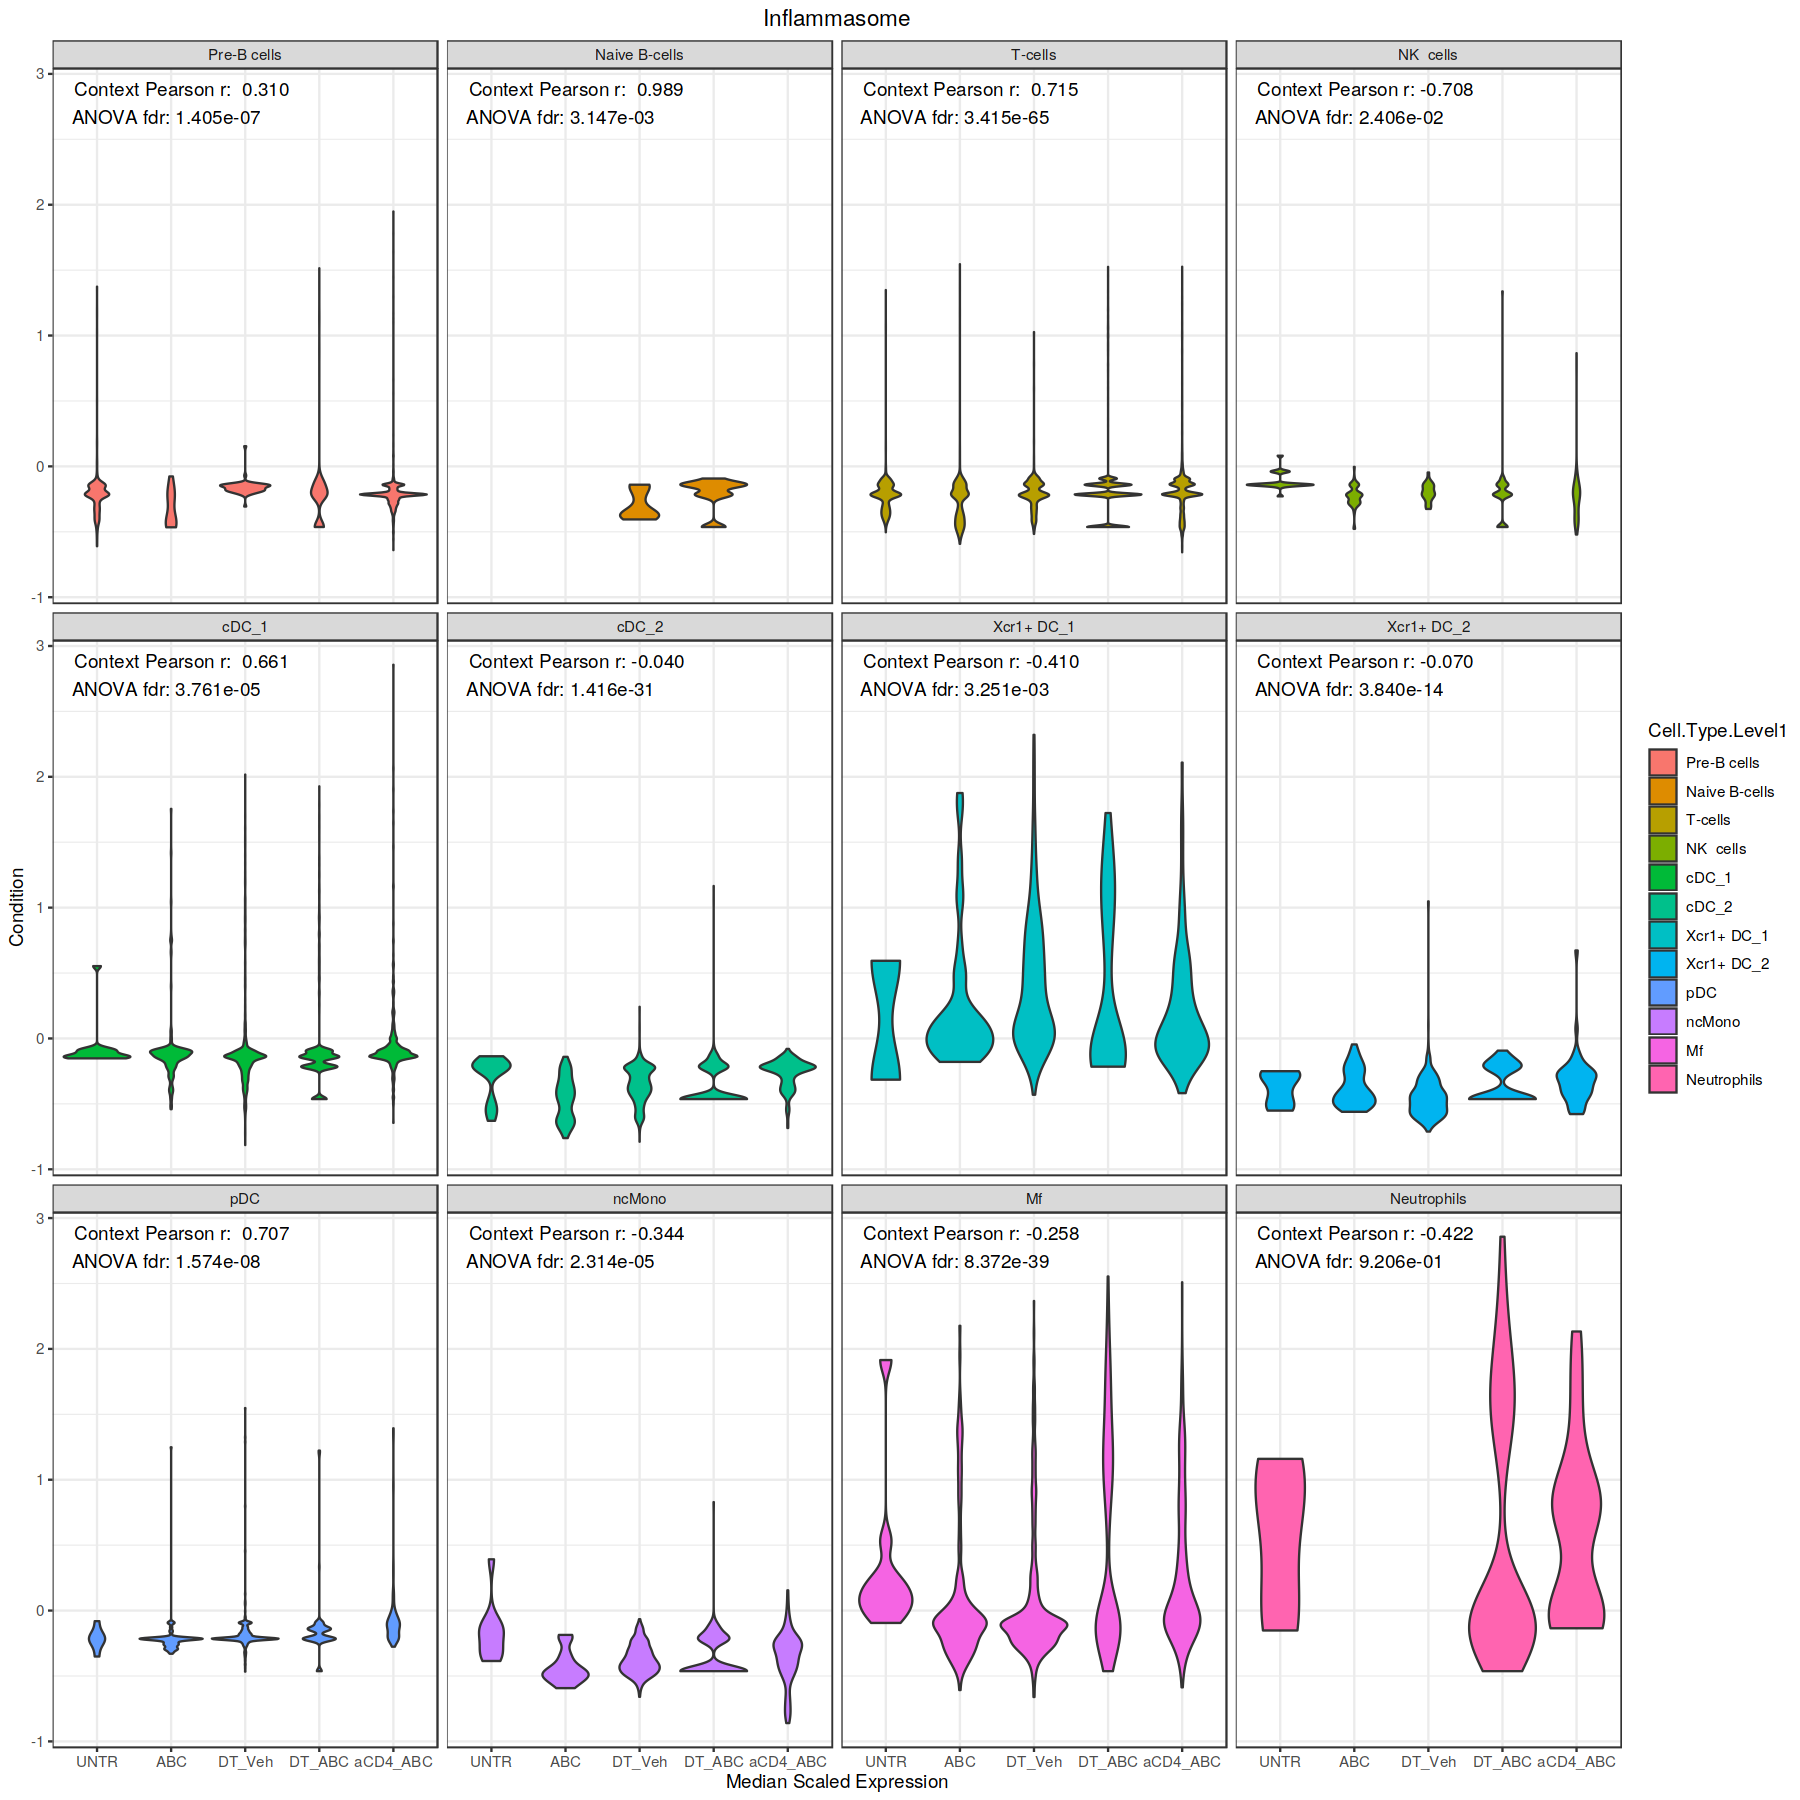

In [470]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.Inflammasome, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Inflammasome') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Condition') + xlab('Median Scaled Expression') + 
geom_text(data=cor.inflammasome, 
          aes(label=paste("Context Pearson r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.inflammasome, 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


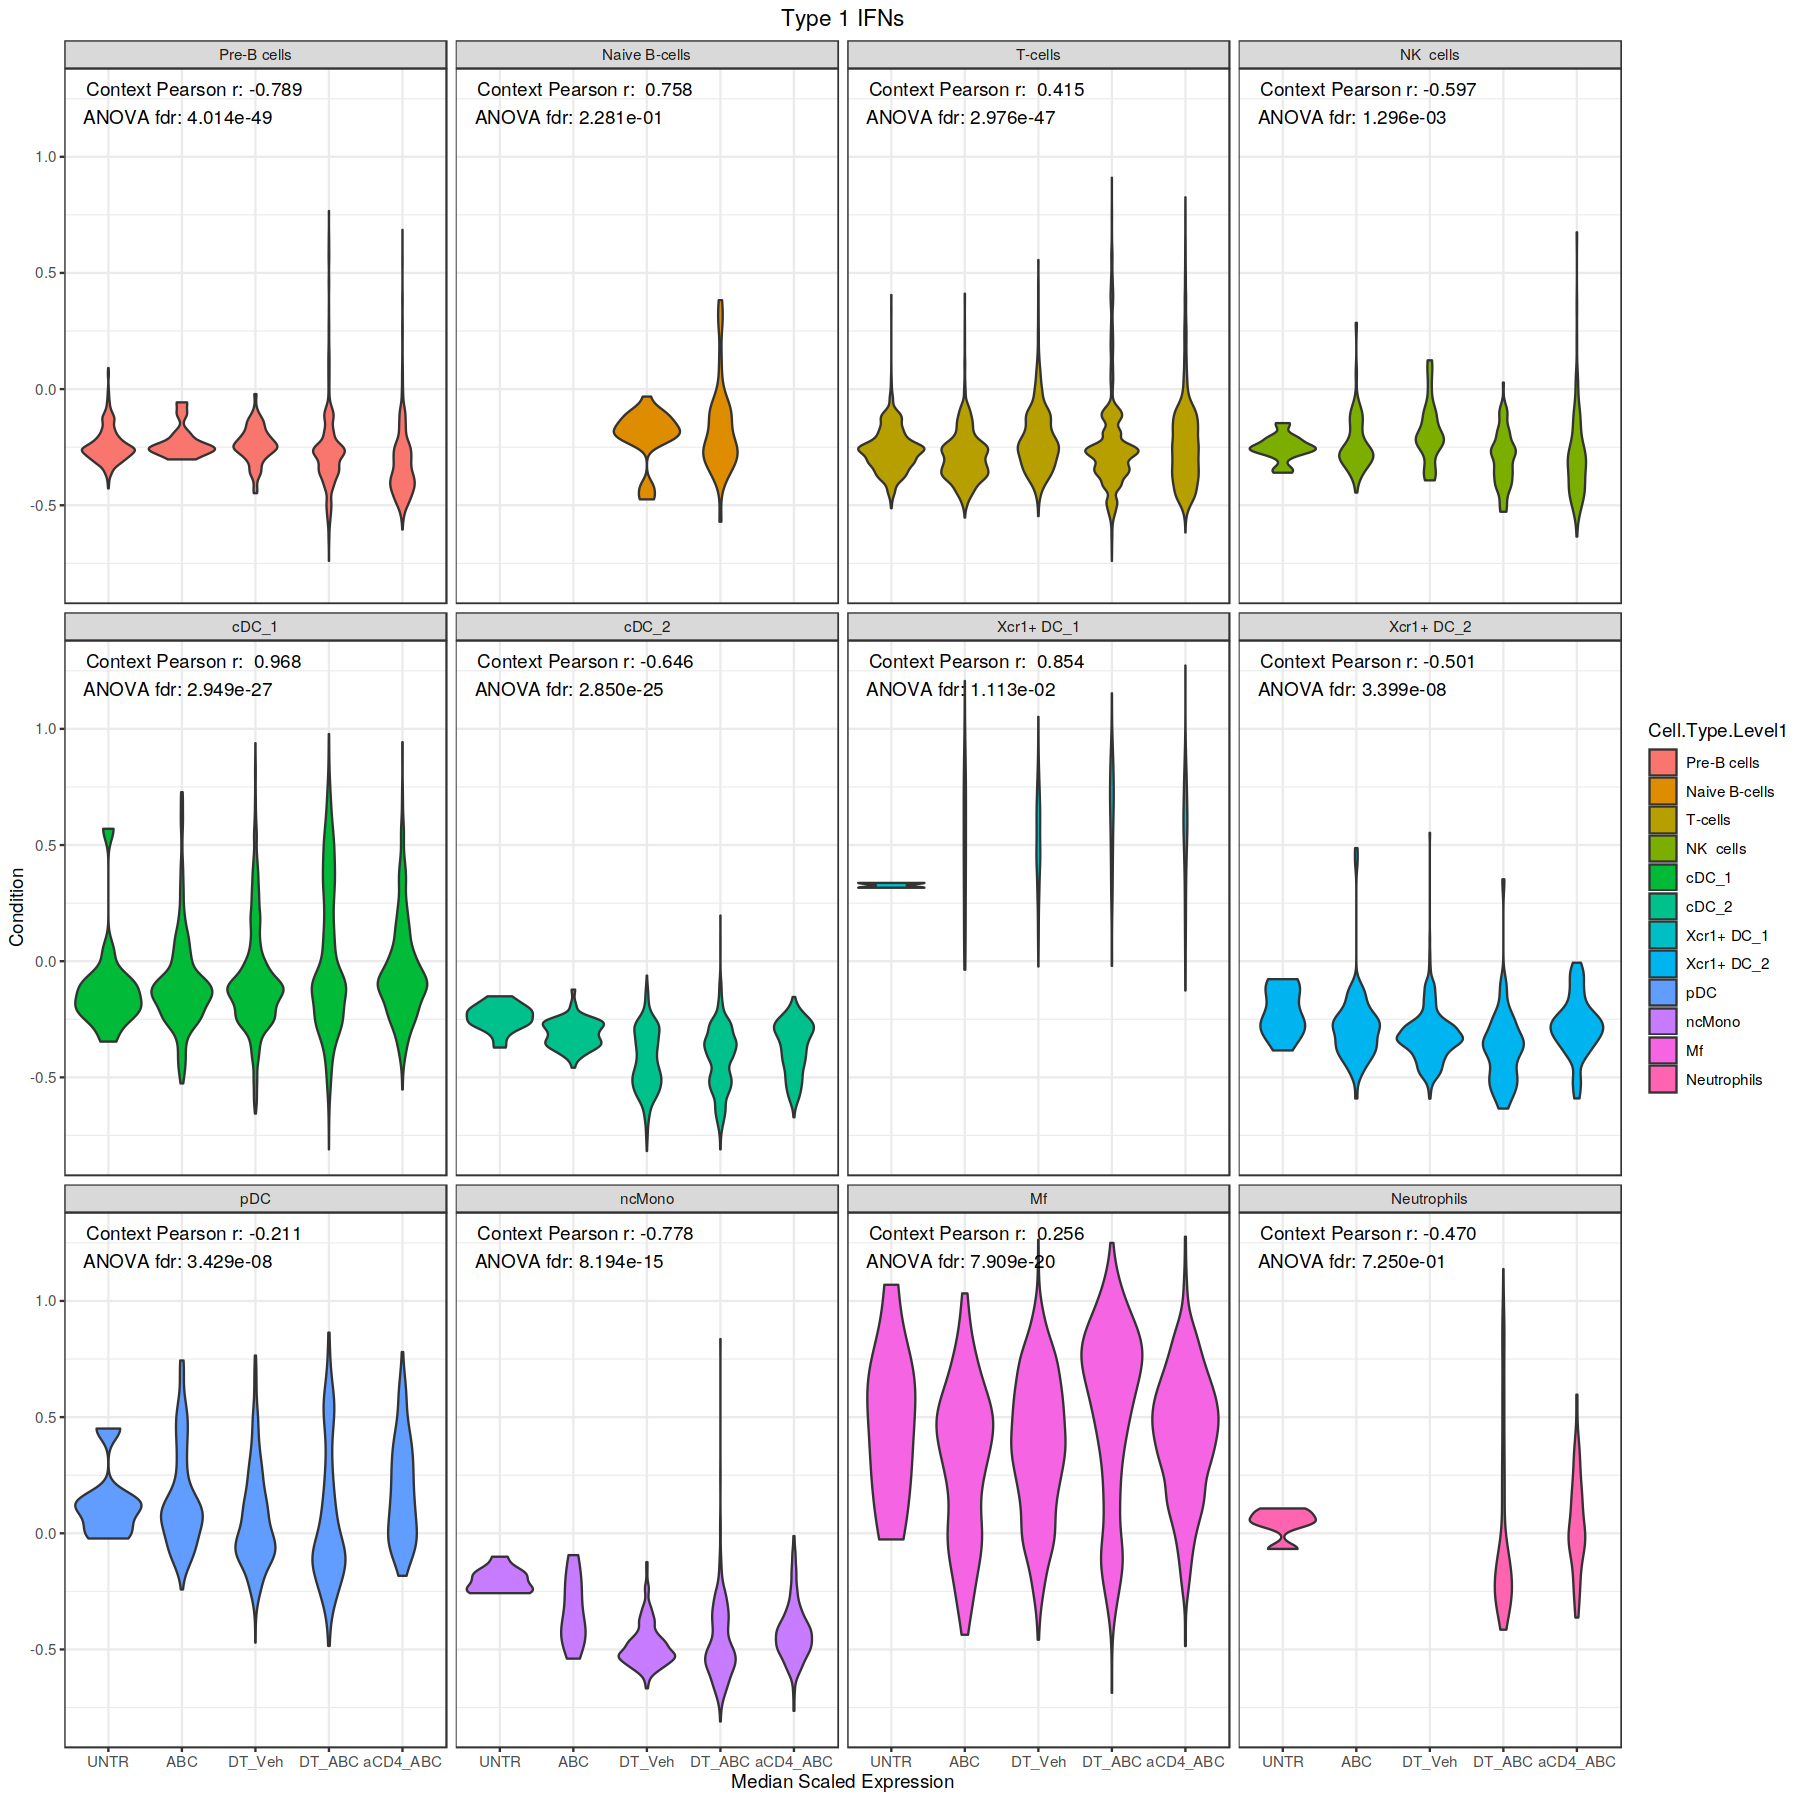

In [471]:
h_ = 15
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = md, aes(x = orig.ident, y = Med.Type1IFNs, fill = Cell.Type.Level1)) + 
geom_violin() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1) + ggtitle('Type 1 IFNs') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Condition') + xlab('Median Scaled Expression') + 
geom_text(data=cor.type1.ifns, 
          aes(label=paste("Context Pearson r: ", format(round(Correlation, 3), nsmall = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 2))+
geom_text(data=anova.type1.ifns, 
          aes(label=paste("ANOVA fdr: ", formatC(ANOVA.fdr, format = "e", digits = 3), sep=""),
             x = -Inf, y = Inf, hjust = -0.1, vjust = 4))

g

Scatter plots look at cell type frequency in a condition (x-axis) vs median expression of a pathway (again aggregated by median in that cell type). This does not consider any order of conditions, so spearman correlation is taken instead. However, scatter plot dots are colored by the condition.

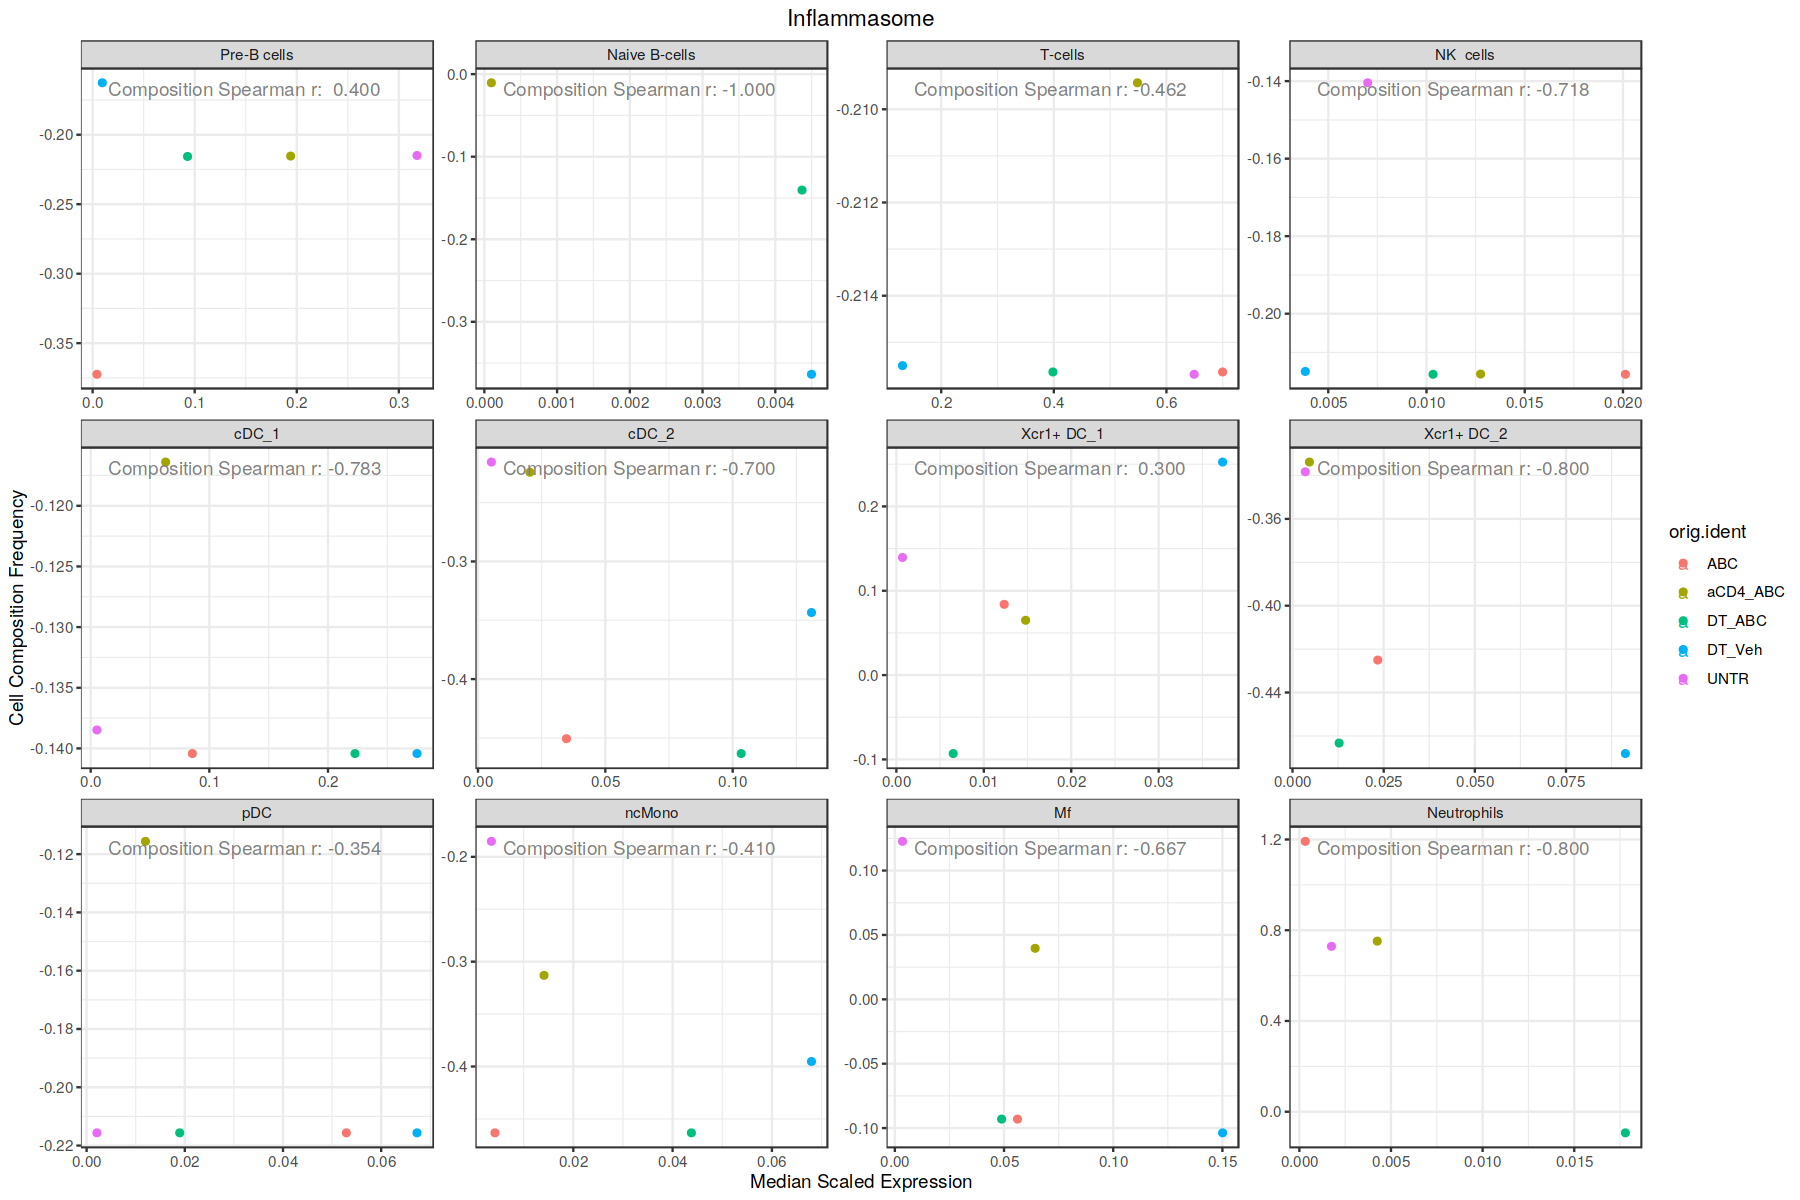

In [403]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.Inflammasome, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Inflammasome') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cor.freq.inflammasome,
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g

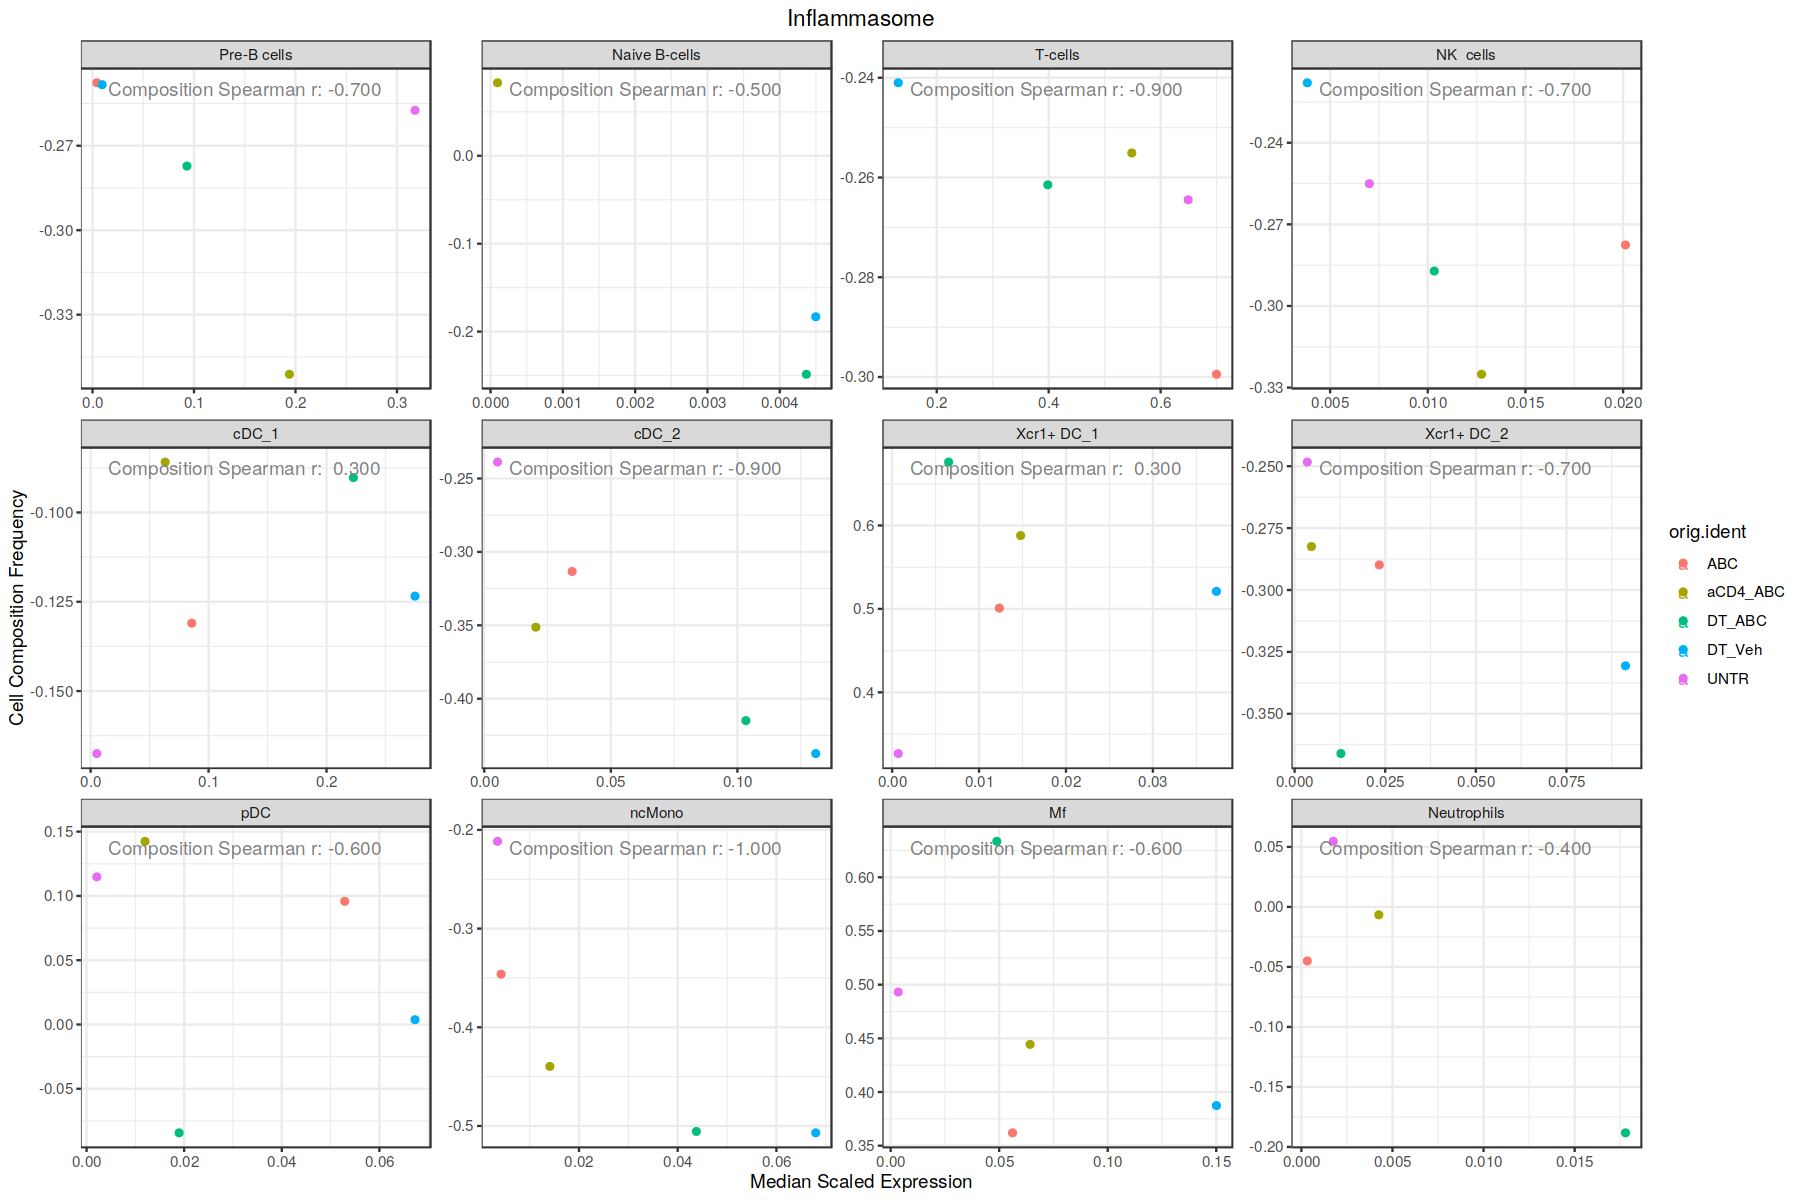

In [408]:
h_ = 10
w_ = 15
options(repr.plot.height=h_, repr.plot.width=w_)

g<-ggplot(data = cors.freq, aes(x = Frequency, y = Med.Type1IFNs, color = orig.ident)) + 
geom_point() + theme_bw() + 
facet_wrap( ~ Cell.Type.Level1, scales = 'free') + ggtitle('Inflammasome') + 
theme(plot.title = element_text(hjust = 0.5)) + 
ylab('Cell Composition Frequency') + xlab('Median Scaled Expression') +
geom_text(data=cor.freq.type1.ifns,
         aes(label = paste("Composition Spearman r: ", format(round(Correlation, 3), nsmall = 3), sep=""), 
         x = -Inf, y = Inf, hjust = -0.1, vjust = 2))

g